In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
#Set to display all the columns in dataset
pd.set_option("display.max_columns", None)
#To run sql queries in DataFrame
import pandasql as psql

In [2]:
#LOADING THE DATASET
data= pd.read_csv(r"C:\Users\Venkata Raghava\OneDrive\Documents\framingham.csv",header = 0)
data_bk=data.copy()
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
#checking the dataset
Target_count=data.TenYearCHD .value_counts()
print('Class 0:',Target_count[0])
print('Class 1:',Target_count[1])
print('proportion:',round(Target_count[0]/Target_count[1],2),':1')
print('Total Records',len(data))

Class 0: 3594
Class 1: 644
proportion: 5.58 :1
Total Records 4238


In [5]:
#Inference:As the ratio<10:1 the dataset is balanced dataset

In [6]:
data.shape

(4238, 16)

In [7]:
#identifing duplicate data
data_dup=data[data.duplicated(keep='last')]
data_dup

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [8]:
#identifing the unique values
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

<Axes: >

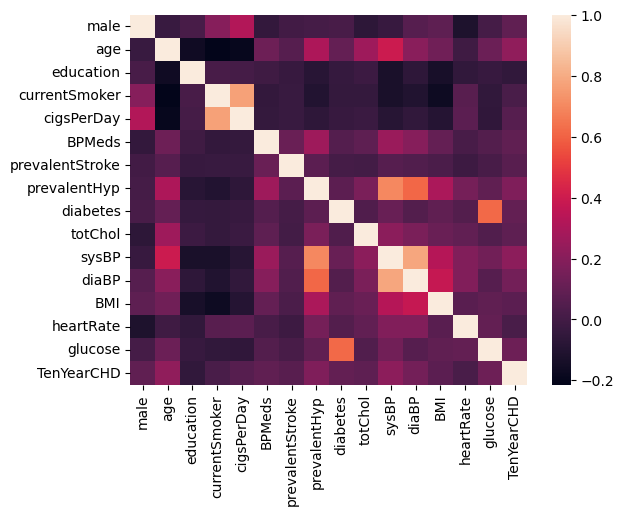

In [9]:
#Identifying the correlation among the variables
corr=data.corr()

#representing correlation using heatmap function of seabord class
sns.heatmap(corr)

In [10]:
#dropping unuseful columns
data=data.drop(['education'],axis=1)
data.head

<bound method NDFrame.head of       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4235     0   48              1        20.0     NaN                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0

# DATA VISUALIZATION

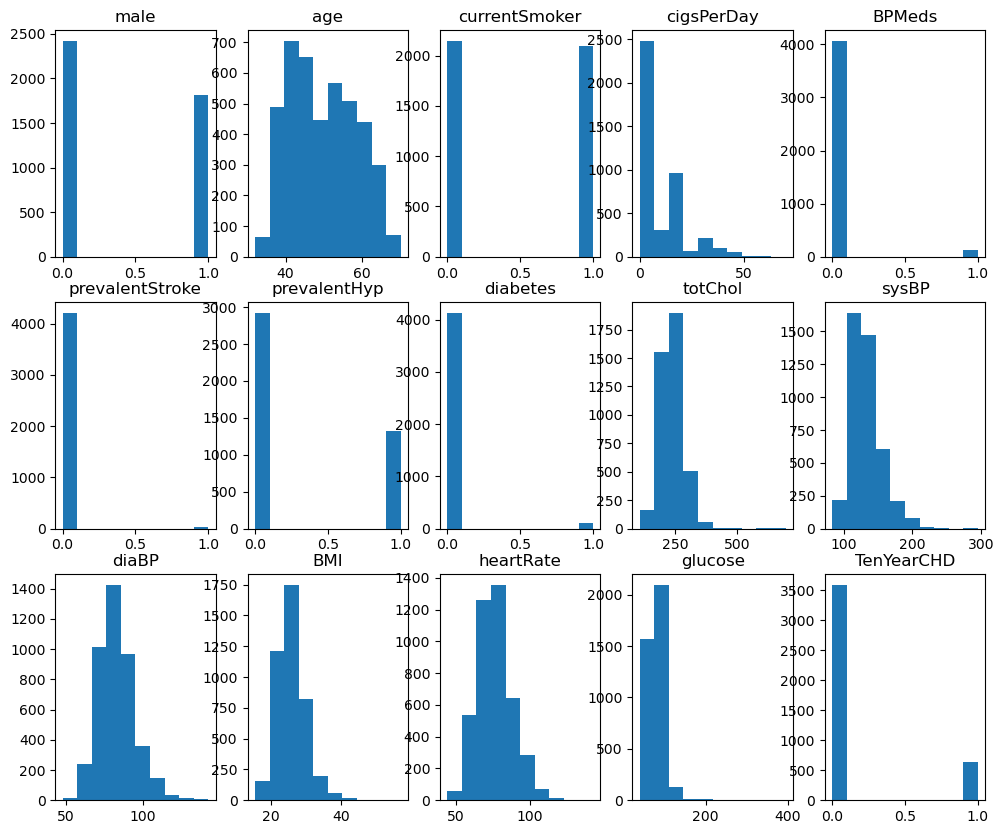

In [11]:
plt.figure(figsize=(12,10),dpi=100)
for i,col in enumerate(data.columns):
    plt.subplot(3,5,i+1)
    plt.title(col)
    plt.hist(data[col])
plt.show()

In [12]:
#identifing missing data
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
#DEALING WITH THE MISSING DATA
from sklearn.impute import KNNImputer
imputer=KNNImputer(missing_values=np.nan)
data['cigsPerDay']=imputer.fit_transform(data[['cigsPerDay']])
data['BPMeds']=imputer.fit_transform(data[['BPMeds']])
data['totChol']=imputer.fit_transform(data[['totChol']])
data['BMI']=imputer.fit_transform(data[['BMI']])
data['heartRate']=imputer.fit_transform(data[['heartRate']])
data['glucose']=imputer.fit_transform(data[['glucose']])
data.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
#converting the data from float to int datatype
data=data.astype(int)

In [15]:
#identifying dependent and independent variables
IndepVar=[]
for col in data.columns:
    if col!='TenYearCHD':
        IndepVar.append(col)
TargetVar='TenYearCHD'
x=data[IndepVar]
y=data[TargetVar]



In [16]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2966, 14), (1272, 14), (2966,), (1272,))

In [17]:
#scaling the values
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
#x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)
#x_test[cols]= mmscaler.fit_transform(x_test[cols])
x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)
y_pred=modelLR.predict(x_test)
y_pred_prob=modelLR.predict_proba(x_test)

In [19]:
params=modelLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predicted values
predicted=y_pred

#confusion matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("Confusion Matrix:\n",matrix)

#outcome values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("Outcome values:\n",tp,fn,fp,tn)

Confusion Matrix:
 [[  18  159]
 [  13 1082]]
Outcome values:
 18 159 13 1082


Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.10      0.17       177
           0       0.87      0.99      0.93      1095

    accuracy                           0.86      1272
   macro avg       0.73      0.54      0.55      1272
weighted avg       0.83      0.86      0.82      1272

Accuracy : 86.5 %
Precision : 58.1 %
Recall : 10.2 %
F1 Score : 0.173
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 54.5 %
MCC : 0.202
roc_auc_score: 0.545


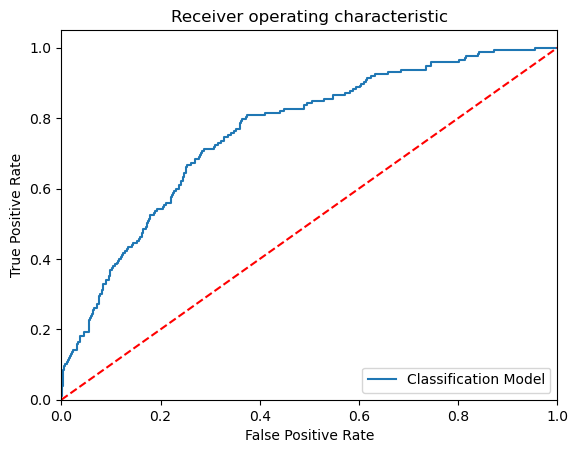

In [21]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)

# Calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC liebetween -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2),'%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, modelLR.predict_proba(x_test)
[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
#adding the result to given dataset
Results = pd.DataFrame({'TenYearCHD_A':y_test, 'TenYearCHD_P':y_pred})

# Merge two Dataframes on index of both the dataframes
ResultsFinal = data.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly
ResultsFinal.sample(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,TenYearCHD_A,TenYearCHD_P
2058,1,60,1,20,0,0,0,0,305,112,75,22,75,98,1,1,0
2963,0,49,0,0,0,0,0,0,228,124,72,21,74,88,0,0,0
795,0,64,1,2,1,0,1,0,230,177,110,28,90,113,0,0,1
3380,0,48,1,5,0,0,0,0,262,141,88,25,80,81,0,0,0
3977,0,46,1,10,0,0,0,0,202,157,94,19,88,65,0,0,0


# COMPARING WITH OTHER CLASSIFICATION ALGORITHMS

In [23]:
#Loading the result file
em=pd.read_csv(r"C:\Users\Venkata Raghava\OneDrive\Documents\EMResults.csv",header= 0)
em.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  18  159]
 [  13 1082]]
Outcome values : 
 18 159 13 1082
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.10      0.17       177
           0       0.87      0.99      0.93      1095

    accuracy                           0.86      1272
   macro avg       0.73      0.54      0.55      1272
weighted avg       0.83      0.86      0.82      1272

7456256865
Accuracy : 86.5 %
Precision : 58.1 %
Recall : 10.2 %
F1 Score : 0.173
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 54.5 %
MCC : 0.202
roc_auc_score: 0.545


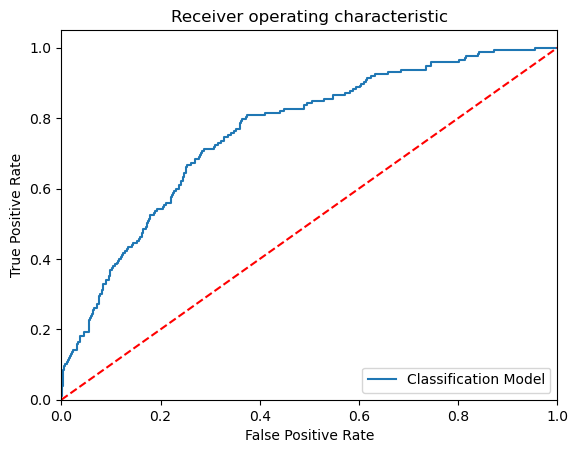

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 59 118]
 [242 853]]
Outcome values : 
 59 118 242 853
Classification report : 
               precision    recall  f1-score   support

           1       0.20      0.33      0.25       177
           0       0.88      0.78      0.83      1095

    accuracy                           0.72      1272
   macro avg       0.54      0.56      0.54      1272
weighted avg       0.78      0.72      0.75      1272

56646503865
Accuracy : 71.7 %
Precision : 19.6 %
Recall : 33.3 %
F1 Score : 0.247
Specificity or True Negative Rate : 77.9 %
Balanced Accuracy : 55.6 %
MCC : 0.091
roc_auc_score: 0.556


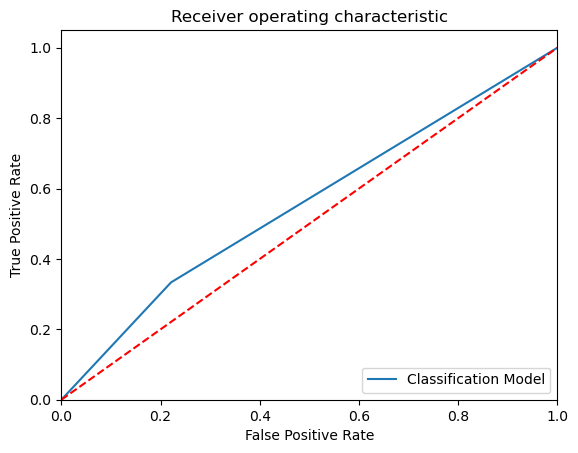

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  15  162]
 [  23 1072]]
Outcome values : 
 15 162 23 1072
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.08      0.14       177
           0       0.87      0.98      0.92      1095

    accuracy                           0.85      1272
   macro avg       0.63      0.53      0.53      1272
weighted avg       0.80      0.85      0.81      1272

9088372980
Accuracy : 85.5 %
Precision : 39.5 %
Recall : 8.5 %
F1 Score : 0.14
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 53.2 %
MCC : 0.13
roc_auc_score: 0.532


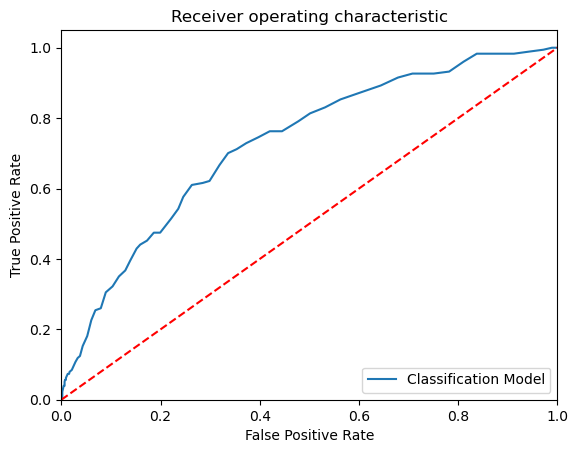

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  13  164]
 [  16 1079]]
Outcome values : 
 13 164 16 1079
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.07      0.13       177
           0       0.87      0.99      0.92      1095

    accuracy                           0.86      1272
   macro avg       0.66      0.53      0.52      1272
weighted avg       0.81      0.86      0.81      1272

6986449305
Accuracy : 85.8 %
Precision : 44.8 %
Recall : 7.3 %
F1 Score : 0.126
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 52.9 %
MCC : 0.136
roc_auc_score: 0.529


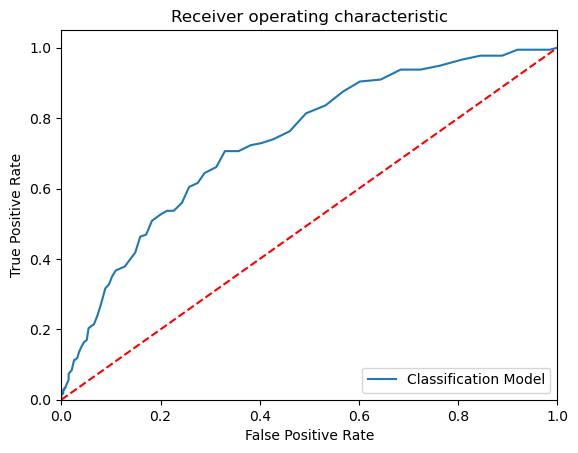

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  19  158]
 [  42 1053]]
Outcome values : 
 19 158 42 1053
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.11      0.16       177
           0       0.87      0.96      0.91      1095

    accuracy                           0.84      1272
   macro avg       0.59      0.53      0.54      1272
weighted avg       0.79      0.84      0.81      1272

14317307865
Accuracy : 84.3 %
Precision : 31.1 %
Recall : 10.7 %
F1 Score : 0.16
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 53.4 %
MCC : 0.112
roc_auc_score: 0.534


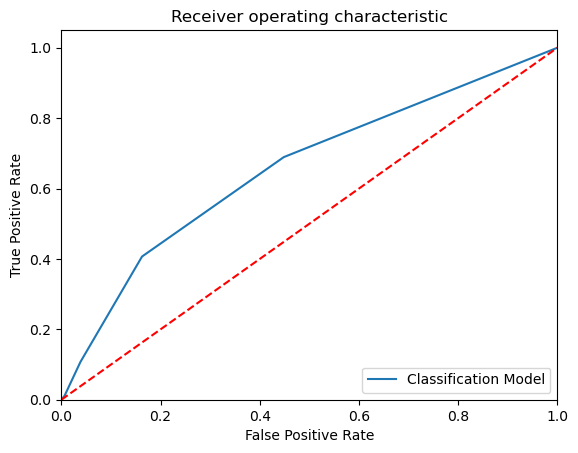

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 54 123]
 [118 977]]
Outcome values : 
 54 123 118 977
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.31      0.31       177
           0       0.89      0.89      0.89      1095

    accuracy                           0.81      1272
   macro avg       0.60      0.60      0.60      1272
weighted avg       0.81      0.81      0.81      1272

36669798000
Accuracy : 81.1 %
Precision : 31.4 %
Recall : 30.5 %
F1 Score : 0.309
Specificity or True Negative Rate : 89.2 %
Balanced Accuracy : 59.8 %
MCC : 0.2
roc_auc_score: 0.599


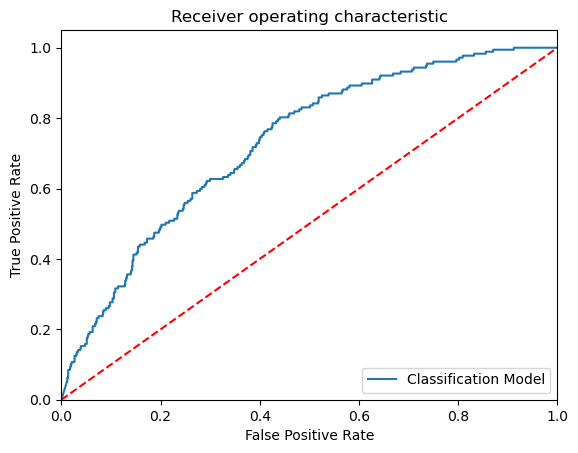

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   1  176]
 [   1 1094]]
Outcome values : 
 1 176 1 1094
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.01      0.01       177
           0       0.86      1.00      0.93      1095

    accuracy                           0.86      1272
   macro avg       0.68      0.50      0.47      1272
weighted avg       0.81      0.86      0.80      1272

492290100
Accuracy : 86.1 %
Precision : 50.0 %
Recall : 0.6 %
F1 Score : 0.011
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.2 %
MCC : 0.041
roc_auc_score: 0.502


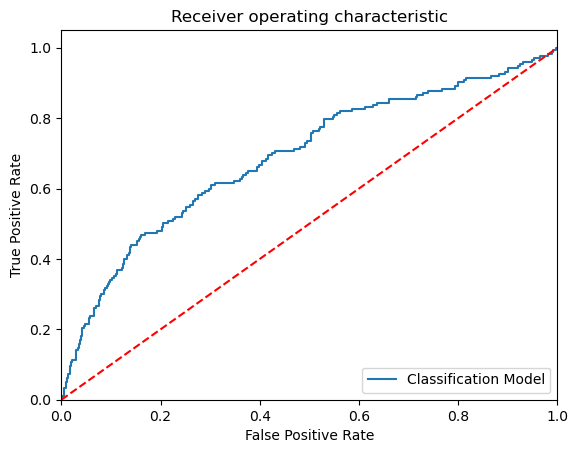

-----------------------------------------------------------------------------------------------------


In [24]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB,ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]

for models in MM:
    
    # Train the model training dataset
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    print('Model Name: ', models)
    # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values
    actual = y_test
    # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted,
    labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn =confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    print(mx)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :',round(specificity*100,2), '%' )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted),3))

    # ROC Curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual,
    models.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------

    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}

    em = em.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
    #======================================================================================================================>

In [25]:
em.head(7)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),18,159,13,1082,0.865,0.581,0.102,0.173,0.988,0.202,0.544911,0.545
1,DecisionTreeClassifier(),59,118,242,853,0.717,0.196,0.333,0.247,0.779,0.091,0.556164,0.556
2,"(DecisionTreeClassifier(max_features='sqrt', r...",15,162,23,1072,0.855,0.395,0.085,0.140,0.979,0.130,0.531871,0.532
3,"(ExtraTreeClassifier(random_state=1732338681),...",13,164,16,1079,0.858,0.448,0.073,0.126,0.985,0.136,0.529417,0.529
4,KNeighborsClassifier(),19,158,42,1053,0.843,0.311,0.107,0.160,0.962,0.112,0.534494,0.534
5,GaussianNB(),54,123,118,977,0.811,0.314,0.305,0.309,0.892,0.200,0.598661,0.598
6,SVC(probability=True),1,176,1,1094,0.861,0.500,0.006,0.011,0.999,0.041,0.502368,0.502


In [26]:
y_pred1=ModelLR.predict(x_test)

In [27]:
Results = pd.DataFrame({'TenYearCHD_A':y_test, 'TenYearCHD_P':y_pred1})

# Merge two Dataframes on index of both the dataframes
r = data.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly
ResultsFinal.sample(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,TenYearCHD_A,TenYearCHD_P
2428,0,44,1,5,0,0,0,0,214,102,68,32,88,80,0,0,0
977,1,39,0,0,0,0,0,0,160,124,90,26,50,67,0,0,0
3912,1,43,1,20,0,0,0,0,184,127,81,28,108,75,0,0,0
3939,1,49,0,0,0,0,0,0,239,116,84,31,88,76,0,0,0
804,1,47,0,0,0,0,1,0,219,132,91,27,75,80,1,1,0


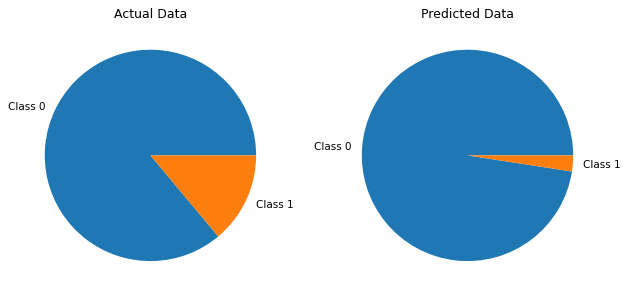

In [28]:
#DATA VISUALIZATION OF TARGET VARIABLE
plt.figure(figsize=(10,15),dpi=75)
plt.subplot(1,2,1)
plt.title('Actual Data')
plt.pie(ResultsFinal['TenYearCHD_A'].value_counts(),labels=['Class 0','Class 1'])
plt.subplot(1,2,2)
plt.title('Predicted Data')
plt.pie(ResultsFinal['TenYearCHD_P'].value_counts(),labels=['Class 0','Class 1'])
plt.show()